In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Create an array to store delay values of each data frame

In [2]:
delayArray = np.array([])
latencyArray = np.array([])

# Calculate delay for data1

In [3]:
df1 = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data1.csv')
df1.head()

,time,speed
0,0.0,0.0
1,0.11561799049377441,0.0
2,0.1719348430633545,0.0
3,0.6214349269866943,0.0
4,0.7613279819488525,0.0


In [4]:
df1.tail()

,time,speed
299,15.882901906967163,0.000000
300,15.915047883987427,0.000000
301,15.963892936706543,0.000000
302,16.00404691696167,0.000000
303,Pause time,10.986675


In [5]:
df1.dtypes

time      object
speed    float64
dtype: object

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [6]:
shape = df1.shape

In [7]:
pauseTime = df1.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.986675024032593

In [8]:
df1["Pause time"] = pauseTime

In [9]:
df1.tail()

,time,speed,Pause time
299,15.882901906967163,0.000000,10.986675
300,15.915047883987427,0.000000,10.986675
301,15.963892936706543,0.000000,10.986675
302,16.00404691696167,0.000000,10.986675
303,Pause time,10.986675,10.986675


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [10]:
df1 = df1.drop(labels=shape[0]-1, axis=0)
df1.tail()

,time,speed,Pause time
298,15.84283185005188,0.0,10.986675
299,15.882901906967163,0.0,10.986675
300,15.915047883987427,0.0,10.986675
301,15.963892936706543,0.0,10.986675
302,16.00404691696167,0.0,10.986675


After getting rid of the string, we can convert the data type to float

In [11]:
df1['time'] = df1['time'].astype(float)
df1.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [12]:
df1Velocities = df1[(df1.speed==0) & (df1.time>pauseTime)]
df1Velocities.head()

stopTime = df1Velocities.iloc[0,0]
stopTime

11.965488910675049

In [13]:
delay1 = stopTime-pauseTime
delayArray = np.append(delayArray, delay1)
delayArray

array([0.97881389])

<b> Delay from the time when the stop command is sent until the robot stops (in seconds) for data1 is: <b>

In [14]:
delay1

0.978813886642456

## Plot the evolution of speed for data1

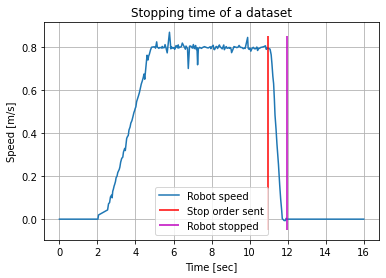

In [15]:
plt.figure()
plt.title("Stopping time of a dataset")
plt.xlabel("Time [sec]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df1.time, df1.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = -0.05, ymax = 0.85, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = -0.05, ymax = 0.85, label = "Robot stopped")
plt.legend()
plt.show()

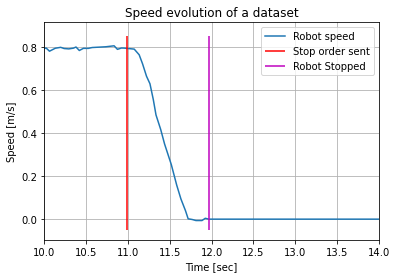

In [16]:
plt.figure()
plt.title("Speed evolution of a dataset")
plt.xlabel("Time [sec]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df1.time, df1.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = -0.05, ymax = 0.85, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = -0.05, ymax = 0.85, label = "Robot Stopped")
plt.legend()
plt.show()

## Calculate the latency using data1: check when does robot speed reach 99% of the velocity it had when the stop command was sent

In [17]:
df1SpeedAtpauseTime = df1[(df1.time >= pauseTime)]
df1SpeedAtpauseTime.head()

,time,speed,Pause time
194,11.075356,0.789790,10.986675
195,11.134613,0.763501,10.986675
196,11.174597,0.721989,10.986675
197,11.222580,0.663509,10.986675
198,11.263378,0.629068,10.986675


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [18]:
speedAtPauseTime = df1SpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.7897899746894836

In [19]:
df1Latency = df1[(df1.speed <= speedAtPauseTime*0.99) & (df1.time>pauseTime)]

In [20]:
df1Latency.head()

,time,speed,Pause time
195,11.134613,0.763501,10.986675
196,11.174597,0.721989,10.986675
197,11.222580,0.663509,10.986675
198,11.263378,0.629068,10.986675
199,11.303495,0.555375,10.986675


In [21]:
responseTime = df1Latency.iloc[0, 0]

In [22]:
latency1 = responseTime-pauseTime
latencyArray = np.append(latencyArray, latency1)
latency1

0.14793801307678223

## Plot the velocity showing the latency for data1:

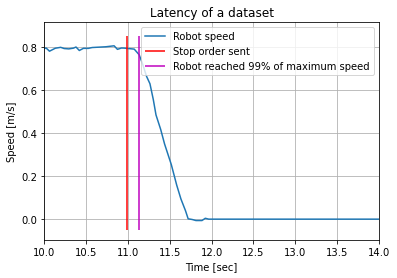

In [23]:
plt.figure()
plt.title("Latency of a dataset")
plt.xlabel("Time [sec]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df1.time, df1.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = -0.05, ymax = 0.85, label = "Stop order sent")
plt.vlines(x = responseTime, color = "m", ymin = -0.05, ymax = 0.85, label = "Robot reached 99% of maximum speed")
plt.legend()
plt.show()

## Calculate delay for data2

In [24]:
df2 = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data2.csv')
df2.head()

,time,speed
0,0.0,0.0
1,0.046871185302734375,0.0
2,0.13727211952209473,0.0
3,0.19325017929077148,0.0
4,1.7178771495819092,0.0


In [25]:
df2.tail()

,time,speed
230,15.854886054992676,0.000000
231,15.918843030929565,0.000000
232,15.959113121032715,0.000000
233,16.026443004608154,0.000000
234,Pause time,12.510233


In [26]:
df2.dtypes

time      object
speed    float64
dtype: object

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [27]:
shape = df2.shape

In [28]:
pauseTime = df2.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

12.510233163833618

In [29]:
df1["Pause time"] = pauseTime

In [30]:
df2.tail()

,time,speed
230,15.854886054992676,0.000000
231,15.918843030929565,0.000000
232,15.959113121032715,0.000000
233,16.026443004608154,0.000000
234,Pause time,12.510233


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [31]:
df2 = df2.drop(labels=shape[0]-1, axis=0)
df2.tail()

,time,speed
229,15.798424005508423,0.0
230,15.854886054992676,0.0
231,15.918843030929565,0.0
232,15.959113121032715,0.0
233,16.026443004608154,0.0


After getting rid of the string, we can convert the data type to float

In [32]:
df2['time'] = df2['time'].astype(float)
df2.dtypes

time     float64
speed    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [33]:
df2Velocities = df2[(df2.speed==0) & (df2.time>pauseTime)]
df2Velocities.head()

stopTime = df2Velocities.iloc[0,0]
stopTime

13.52157998085022

In [34]:
delay2 = stopTime-pauseTime
delayArray = np.append(delayArray, delay2)
delayArray

array([0.97881389, 1.01134682])

<b> Delay (in seconds) for data1 is: <b>

In [35]:
delay2

1.0113468170166016

## Plot the evolution of speed for data2

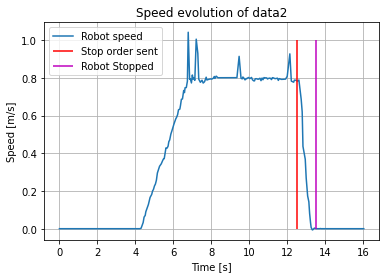

In [36]:
plt.figure()
plt.title("Speed evolution of data2")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df2.time, df2.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

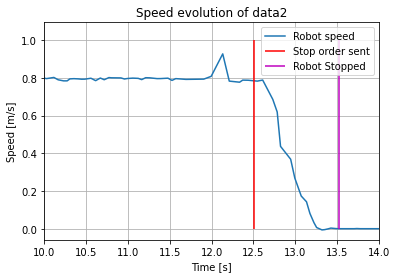

In [37]:
plt.figure()
plt.title("Speed evolution of data2")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df2.time, df2.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [38]:
df2SpeedAtpauseTime = df2[(df2.time >= pauseTime)]
df2SpeedAtpauseTime.head()

,time,speed
166,12.546280,0.783031
167,12.610351,0.788661
168,12.731038,0.686169
169,12.783651,0.619350
170,12.823633,0.436800


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [39]:
speedAtPauseTime = df2SpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.7830311059951782

In [40]:
df2Latency = df2[(df2.speed <= speedAtPauseTime*0.99) & (df2.time>pauseTime)]

In [41]:
df2Latency.head()

,time,speed
168,12.731038,0.686169
169,12.783651,0.619350
170,12.823633,0.436800
171,12.944548,0.368582
172,12.994347,0.268369


In [42]:
responseTime = df2Latency.iloc[0, 0]

In [43]:
latency2 = responseTime-pauseTime
latencyArray = np.append(latencyArray, latency2)
latency2

0.22080492973327637

## Calculate delay for data3

In [44]:
df3 = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data3.csv')
df3.head()

,time,speed
0,0.0,0.0
1,0.12037491798400879,0.0
2,0.1531050205230713,0.0
3,0.31700992584228516,0.0
4,0.35754895210266113,0.0


In [45]:
df3.tail()

,time,speed
211,15.73607587814331,0.000000
212,15.86378288269043,0.000000
213,15.968127012252808,0.000000
214,16.055697917938232,0.000000
215,Pause time,10.479635


In [46]:
df3.dtypes

time      object
speed    float64
dtype: object

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [47]:
shape = df3.shape

In [48]:
pauseTime = df3.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.479635000228882

In [49]:
df3["Pause time"] = pauseTime

In [50]:
df3.tail()

,time,speed,Pause time
211,15.73607587814331,0.000000,10.479635
212,15.86378288269043,0.000000,10.479635
213,15.968127012252808,0.000000,10.479635
214,16.055697917938232,0.000000,10.479635
215,Pause time,10.479635,10.479635


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [51]:
df3 = df3.drop(labels=shape[0]-1, axis=0)
df3.tail()

,time,speed,Pause time
210,15.686506986618042,0.0,10.479635
211,15.73607587814331,0.0,10.479635
212,15.86378288269043,0.0,10.479635
213,15.968127012252808,0.0,10.479635
214,16.055697917938232,0.0,10.479635


After getting rid of the string, we can convert the data type to float

In [52]:
df3['time'] = df3['time'].astype(float)
df3.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [53]:
df3Velocities = df3[(df3.speed==0) & (df3.time>pauseTime)]
df3Velocities.head()

stopTime = df3Velocities.iloc[0,0]
stopTime

11.421509027481079

In [54]:
delay3 = stopTime-pauseTime
delayArray = np.append(delayArray, delay3)
delayArray

array([0.97881389, 1.01134682, 0.94187403])

<b> Delay (in seconds) for data1 is: <b>

In [55]:
delay3

0.9418740272521973

## Plot the evolution of speed for data3

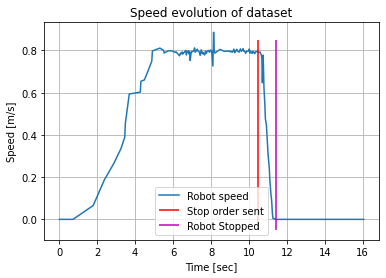

In [56]:
plt.figure()
plt.title("Speed evolution of dataset")
plt.xlabel("Time [sec]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df3.time, df3.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = -0.05, ymax = 0.85, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = -0.05, ymax = 0.85, label = "Robot Stopped")
plt.legend()
plt.show()

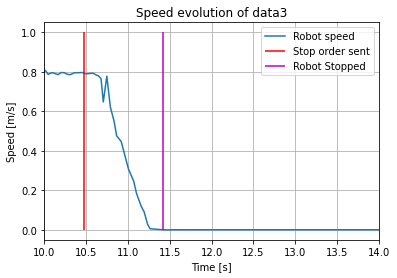

In [57]:
plt.figure()
plt.title("Speed evolution of data3")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df3.time, df3.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [58]:
df3SpeedAtpauseTime = df3[(df1.time >= pauseTime)]
df3SpeedAtpauseTime.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_45112\723349672.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3SpeedAtpauseTime = df3[(df1.time >= pauseTime)]


,time,speed,Pause time
187,14.375457,0.0,10.479635
188,14.410117,0.0,10.479635
189,14.441904,0.0,10.479635
190,14.473162,0.0,10.479635
191,14.529730,0.0,10.479635


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [59]:
speedAtPauseTime = df3SpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.0

In [60]:
df3Latency = df3[(df3.speed <= speedAtPauseTime*0.99) & (df3.time>pauseTime)]

In [61]:
df3Latency.head()

,time,speed,Pause time
136,11.421509,0.000000,10.479635
137,11.477497,-0.000805,10.479635
138,11.508895,0.000000,10.479635
139,11.605481,0.000000,10.479635
140,11.656607,0.000000,10.479635


In [62]:
responseTime = df3Latency.iloc[0, 0]

In [63]:
latency3 = responseTime-pauseTime
latency3
#latencyArray = np.append(latencyArray, latency3)

0.9418740272521973

In [64]:
latency3

0.9418740272521973

## Calculate delay for data4

In [65]:
df = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data4.csv')

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [66]:
shape = df.shape

In [67]:
pauseTime = df.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.425464868545532

In [68]:
df["Pause time"] = pauseTime

In [69]:
df.tail()

,time,speed,Pause time
306,15.85444688796997,0.000000,10.425465
307,15.898273944854736,0.000000,10.425465
308,15.944726943969727,0.000000,10.425465
309,16.00248098373413,0.000000,10.425465
310,Pause time,10.425465,10.425465


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [70]:
df = df.drop(labels=shape[0]-1, axis=0)
df.tail()

,time,speed,Pause time
305,15.811163902282715,0.0,10.425465
306,15.85444688796997,0.0,10.425465
307,15.898273944854736,0.0,10.425465
308,15.944726943969727,0.0,10.425465
309,16.00248098373413,0.0,10.425465


After getting rid of the string, we can convert the data type to float

In [71]:
df['time'] = df['time'].astype(float)
df.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [72]:
dfVelocities = df[(df.speed==0) & (df.time>pauseTime)]
dfVelocities.head()

stopTime = dfVelocities.iloc[0,0]
stopTime

11.384156942367554

In [73]:
delay = stopTime-pauseTime
delayArray = np.append(delayArray, delay)
delayArray

array([0.97881389, 1.01134682, 0.94187403, 0.95869207])

<b> Delay (in seconds) for data1 is: <b>

In [74]:
delay

0.9586920738220215

## Plot the evolution of speed for data4

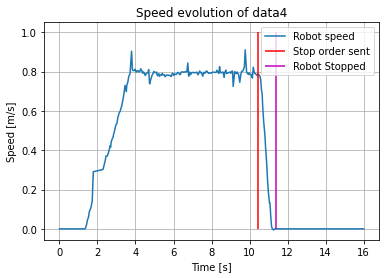

In [75]:
plt.figure()
plt.title("Speed evolution of data4")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

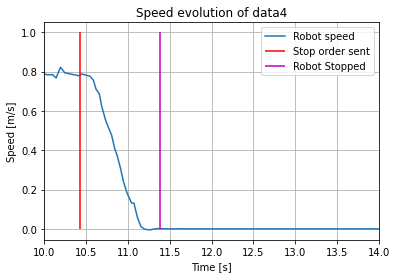

In [76]:
plt.figure()
plt.title("Speed evolution of data4")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [77]:
dfSpeedAtpauseTime = df[(df.time >= pauseTime)]
dfSpeedAtpauseTime.head()

,time,speed,Pause time
189,10.446090,0.787628,10.425465
190,10.511831,0.780038,10.425465
191,10.544606,0.776711,10.425465
192,10.587258,0.756512,10.425465
193,10.618748,0.710831,10.425465


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [78]:
speedAtPauseTime = dfSpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.7876278162002563

In [79]:
dfLatency = df[(df.speed <= speedAtPauseTime*0.99) & (df.time>pauseTime)]

In [80]:
dfLatency.head()

,time,speed,Pause time
191,10.544606,0.776711,10.425465
192,10.587258,0.756512,10.425465
193,10.618748,0.710831,10.425465
194,10.658495,0.686094,10.425465
195,10.687144,0.623224,10.425465


In [81]:
responseTime = dfLatency.iloc[0, 0]

In [82]:
latency4 = responseTime-pauseTime
latency4
latencyArray = np.append(latencyArray, latency4)

In [83]:
latency4

0.1191411018371582

## Calculate delay for data5

In [84]:
df = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data5.csv')

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [85]:
shape = df.shape

In [86]:
pauseTime = df.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.387151956558228

In [87]:
df["Pause time"] = pauseTime

In [88]:
df.tail()

,time,speed,Pause time
286,15.903532028198242,0.000000,10.387152
287,15.947618007659912,0.000000,10.387152
288,15.980165004730225,0.000000,10.387152
289,16.020148992538452,0.000000,10.387152
290,Pause time,10.387152,10.387152


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [89]:
df = df.drop(labels=shape[0]-1, axis=0)
df.tail()

,time,speed,Pause time
285,15.871543884277344,0.0,10.387152
286,15.903532028198242,0.0,10.387152
287,15.947618007659912,0.0,10.387152
288,15.980165004730225,0.0,10.387152
289,16.020148992538452,0.0,10.387152


After getting rid of the string, we can convert the data type to float

In [90]:
df['time'] = df['time'].astype(float)
df.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [91]:
dfVelocities = df[(df.speed==0) & (df.time>pauseTime)]
dfVelocities.head()

stopTime = dfVelocities.iloc[0,0]
stopTime

11.277233839035034

In [92]:
delay = stopTime-pauseTime
delayArray = np.append(delayArray, delay)
delayArray

array([0.97881389, 1.01134682, 0.94187403, 0.95869207, 0.89008188])

<b> Delay (in seconds) for data1 is: <b>

In [93]:
delay

0.8900818824768066

## Plot the evolution of speed for data5

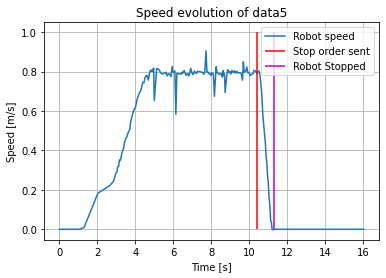

In [94]:
plt.figure()
plt.title("Speed evolution of data5")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

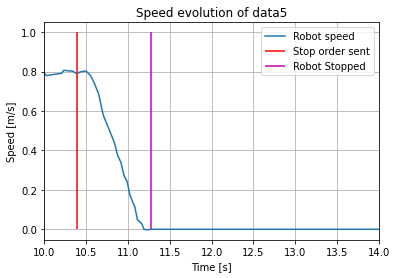

In [95]:
plt.figure()
plt.title("Speed evolution of data5")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [96]:
dfSpeedAtpauseTime = df[(df.time >= pauseTime)]
dfSpeedAtpauseTime.head()

,time,speed,Pause time
164,10.390171,0.790051,10.387152
165,10.432678,0.798980,10.387152
166,10.500963,0.803572,10.387152
167,10.553772,0.779755,10.387152
168,10.596699,0.743484,10.387152


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [97]:
speedAtPauseTime = dfSpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.7900509834289551

In [98]:
dfLatency = df[(df.speed <= speedAtPauseTime*0.99) & (df.time>pauseTime)]

In [99]:
dfLatency.head()

,time,speed,Pause time
167,10.553772,0.779755,10.387152
168,10.596699,0.743484,10.387152
169,10.649403,0.688594,10.387152
170,10.705430,0.579571,10.387152
171,10.840283,0.437894,10.387152


In [100]:
responseTime = dfLatency.iloc[0, 0]

In [101]:
latency = responseTime-pauseTime
latency
latencyArray = np.append(latencyArray, latency)

In [102]:
latency

0.16662001609802246

## Calculate delay for data6

In [103]:
df = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data6.csv')

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [104]:
shape = df.shape

In [105]:
pauseTime = df.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.482339143753052

In [106]:
df["Pause time"] = pauseTime

In [107]:
df.tail()

,time,speed,Pause time
201,15.890815019607544,0.000000,10.482339
202,15.951295137405396,0.000000,10.482339
203,15.986468076705933,0.000000,10.482339
204,16.062108039855957,0.000000,10.482339
205,Pause time,10.482339,10.482339


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [108]:
df = df.drop(labels=shape[0]-1, axis=0)
df.tail()

,time,speed,Pause time
200,15.833261966705322,0.0,10.482339
201,15.890815019607544,0.0,10.482339
202,15.951295137405396,0.0,10.482339
203,15.986468076705933,0.0,10.482339
204,16.062108039855957,0.0,10.482339


After getting rid of the string, we can convert the data type to float

In [109]:
df['time'] = df['time'].astype(float)
df.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [110]:
dfVelocities = df[(df.speed==0) & (df.time>pauseTime)]
dfVelocities.head()

stopTime = dfVelocities.iloc[0,0]
stopTime

11.315574169158936

In [111]:
delay = stopTime-pauseTime
delayArray = np.append(delayArray, delay)
delayArray

array([0.97881389, 1.01134682, 0.94187403, 0.95869207, 0.89008188,
       0.83323503])

<b> Delay (in seconds) for data1 is: <b>

In [112]:
delay

0.8332350254058838

## Plot the evolution of speed for data6

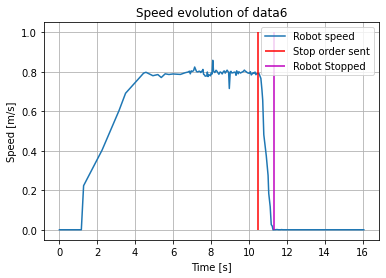

In [113]:
plt.figure()
plt.title("Speed evolution of data6")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

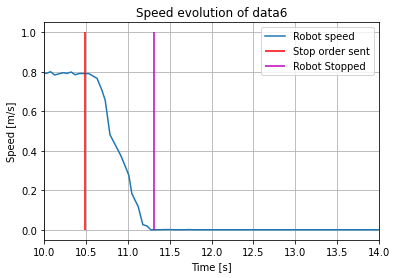

In [114]:
plt.figure()
plt.title("Speed evolution of data6")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [115]:
dfSpeedAtpauseTime = df[(df.time >= pauseTime)]
dfSpeedAtpauseTime.head()

,time,speed,Pause time
101,10.533496,0.790423,10.482339
102,10.631659,0.766308,10.482339
103,10.688827,0.707227,10.482339
104,10.728874,0.655660,10.482339
105,10.785880,0.481218,10.482339


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [116]:
speedAtPauseTime = dfSpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.790422797203064

In [117]:
dfLatency = df[(df.speed <= speedAtPauseTime*0.99) & (df.time>pauseTime)]

In [118]:
dfLatency.head()

,time,speed,Pause time
102,10.631659,0.766308,10.482339
103,10.688827,0.707227,10.482339
104,10.728874,0.655660,10.482339
105,10.785880,0.481218,10.482339
106,10.916961,0.374229,10.482339


In [119]:
responseTime = dfLatency.iloc[0, 0]

In [120]:
latency = responseTime-pauseTime
latency
latencyArray = np.append(latencyArray, latency)

In [121]:
latency

0.14931988716125488

## Calculate delay for data7

In [122]:
df = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data7.csv')

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [123]:
shape = df.shape

In [124]:
pauseTime = df.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.431519985198976

In [125]:
df["Pause time"] = pauseTime

In [126]:
df.tail()

,time,speed,Pause time
272,15.866192102432251,0.00000,10.43152
273,15.918477058410645,0.00000,10.43152
274,15.972774028778076,0.00000,10.43152
275,16.02906608581543,0.00000,10.43152
276,Pause time,10.43152,10.43152


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [127]:
df = df.drop(labels=shape[0]-1, axis=0)
df.tail()

,time,speed,Pause time
271,15.76233696937561,0.0,10.43152
272,15.866192102432251,0.0,10.43152
273,15.918477058410645,0.0,10.43152
274,15.972774028778076,0.0,10.43152
275,16.02906608581543,0.0,10.43152


After getting rid of the string, we can convert the data type to float

In [128]:
df['time'] = df['time'].astype(float)
df.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [129]:
dfVelocities = df[(df.speed==0) & (df.time>pauseTime)]
dfVelocities.head()

stopTime = dfVelocities.iloc[0,0]
stopTime

11.408005952835083

In [130]:
delay = stopTime-pauseTime
delayArray = np.append(delayArray, delay)
delayArray

array([0.97881389, 1.01134682, 0.94187403, 0.95869207, 0.89008188,
       0.83323503, 0.97648597])

<b> Delay (in seconds) for data1 is: <b>

In [131]:
delay

0.9764859676361066

## Plot the evolution of speed for data7

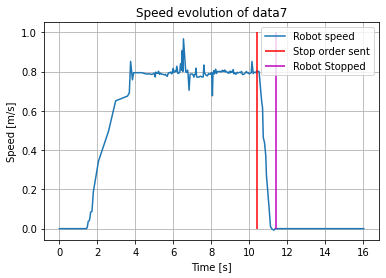

In [132]:
plt.figure()
plt.title("Speed evolution of data7")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

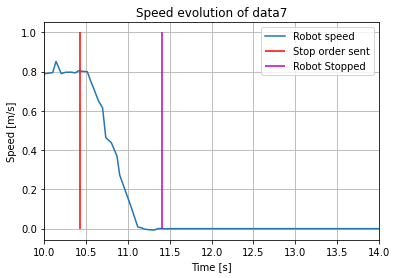

In [133]:
plt.figure()
plt.title("Speed evolution of data7")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [134]:
dfSpeedAtpauseTime = df[(df.time >= pauseTime)]
dfSpeedAtpauseTime.head()

,time,speed,Pause time
152,10.463912,0.800930,10.43152
153,10.515146,0.799076,10.43152
154,10.554947,0.751747,10.43152
155,10.588905,0.716616,10.43152
156,10.648162,0.650487,10.43152


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [135]:
speedAtPauseTime = dfSpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.8009296655654907

In [136]:
dfLatency = df[(df.speed <= speedAtPauseTime*0.99) & (df.time>pauseTime)]

In [137]:
dfLatency.head()

,time,speed,Pause time
154,10.554947,0.751747,10.43152
155,10.588905,0.716616,10.43152
156,10.648162,0.650487,10.43152
157,10.697501,0.615272,10.43152
158,10.735712,0.463565,10.43152


In [138]:
responseTime = dfLatency.iloc[0, 0]

In [139]:
latency = responseTime-pauseTime
latency
latencyArray = np.append(latencyArray, latency)

In [140]:
latency

0.12342715263366522

## Calculate delay for data8

In [141]:
df = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data8.csv')

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [142]:
shape = df.shape

In [143]:
pauseTime = df.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.438840866088867

In [144]:
df["Pause time"] = pauseTime

In [145]:
df.tail()

,time,speed,Pause time
278,15.893618822097778,0.000000,10.438841
279,15.927810907363892,0.000000,10.438841
280,15.960583925247192,0.000000,10.438841
281,16.009933948516846,0.000000,10.438841
282,Pause time,10.438841,10.438841


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [146]:
df = df.drop(labels=shape[0]-1, axis=0)
df.tail()

,time,speed,Pause time
277,15.860317945480347,0.0,10.438841
278,15.893618822097778,0.0,10.438841
279,15.927810907363892,0.0,10.438841
280,15.960583925247192,0.0,10.438841
281,16.009933948516846,0.0,10.438841


After getting rid of the string, we can convert the data type to float

In [147]:
df['time'] = df['time'].astype(float)
df.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [148]:
dfVelocities = df[(df.speed==0) & (df.time>pauseTime)]
dfVelocities.head()

stopTime = dfVelocities.iloc[0,0]
stopTime

11.438024997711182

In [149]:
delay = stopTime-pauseTime
delayArray = np.append(delayArray, delay)
delayArray

array([0.97881389, 1.01134682, 0.94187403, 0.95869207, 0.89008188,
       0.83323503, 0.97648597, 0.99918413])

<b> Delay (in seconds) for data1 is: <b>

In [150]:
delay

0.9991841316223145

## Plot the evolution of speed for data8

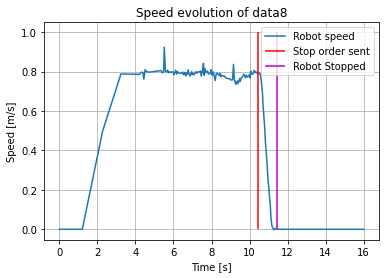

In [151]:
plt.figure()
plt.title("Speed evolution of data8")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

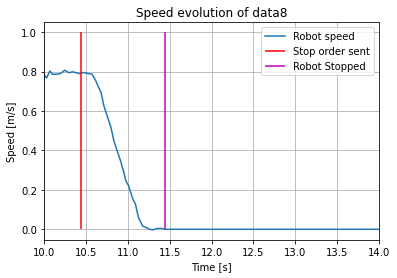

In [152]:
plt.figure()
plt.title("Speed evolution of data8")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [153]:
dfSpeedAtpauseTime = df[(df.time >= pauseTime)]
dfSpeedAtpauseTime.head()

,time,speed,Pause time
142,10.466920,0.795860,10.438841
143,10.533938,0.789631,10.438841
144,10.571413,0.787475,10.438841
145,10.615613,0.754134,10.438841
146,10.651595,0.719158,10.438841


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [154]:
speedAtPauseTime = dfSpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.7958603501319885

In [155]:
dfLatency = df[(df.speed <= speedAtPauseTime*0.99) & (df.time>pauseTime)]

In [156]:
dfLatency.head()

,time,speed,Pause time
144,10.571413,0.787475,10.438841
145,10.615613,0.754134,10.438841
146,10.651595,0.719158,10.438841
147,10.681133,0.692574,10.438841
148,10.711887,0.628154,10.438841


In [157]:
responseTime = dfLatency.iloc[0, 0]

In [158]:
latency = responseTime-pauseTime
latency
latencyArray = np.append(latencyArray, latency)

In [159]:
latency

0.13257217407226562

## Calculate delay for data9

In [160]:
df = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data9.csv')

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [161]:
shape = df.shape

In [162]:
pauseTime = df.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.418787002563477

In [163]:
df["Pause time"] = pauseTime

In [164]:
df.tail()

,time,speed,Pause time
244,15.871170043945312,0.000000,10.418787
245,15.928185939788818,0.000000,10.418787
246,15.976769924163818,0.000000,10.418787
247,16.018687963485718,0.000000,10.418787
248,Pause time,10.418787,10.418787


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [165]:
df = df.drop(labels=shape[0]-1, axis=0)
df.tail()

,time,speed,Pause time
243,15.812210083007812,0.0,10.418787
244,15.871170043945312,0.0,10.418787
245,15.928185939788818,0.0,10.418787
246,15.976769924163818,0.0,10.418787
247,16.018687963485718,0.0,10.418787


After getting rid of the string, we can convert the data type to float

In [166]:
df['time'] = df['time'].astype(float)
df.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [167]:
dfVelocities = df[(df.speed==0) & (df.time>pauseTime)]
dfVelocities.head()

stopTime = dfVelocities.iloc[0,0]
stopTime

11.243854999542236

In [168]:
delay = stopTime-pauseTime
delayArray = np.append(delayArray, delay)
delayArray

array([0.97881389, 1.01134682, 0.94187403, 0.95869207, 0.89008188,
       0.83323503, 0.97648597, 0.99918413, 0.825068  ])

<b> Delay (in seconds) for data1 is: <b>

In [169]:
delay

0.8250679969787598

## Plot the evolution of speed for data9

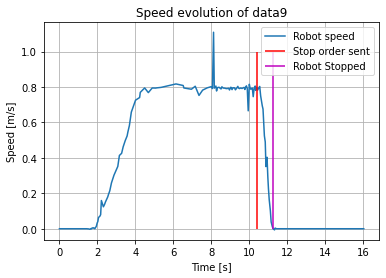

In [170]:
plt.figure()
plt.title("Speed evolution of data9")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

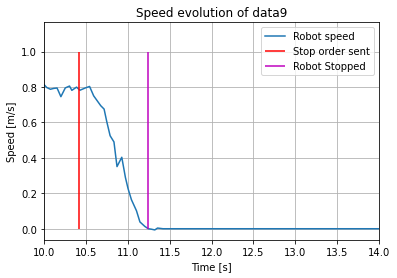

In [171]:
plt.figure()
plt.title("Speed evolution of data9")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [172]:
dfSpeedAtpauseTime = df[(df.time >= pauseTime)]
dfSpeedAtpauseTime.head()

,time,speed,Pause time
129,10.427179,0.781731,10.418787
130,10.493834,0.795086,10.418787
131,10.542300,0.802925,10.418787
132,10.591009,0.750023,10.418787
133,10.675280,0.694493,10.418787


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [173]:
speedAtPauseTime = dfSpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.7817308306694031

In [174]:
dfLatency = df[(df.speed <= speedAtPauseTime*0.99) & (df.time>pauseTime)]

In [175]:
dfLatency.head()

,time,speed,Pause time
132,10.591009,0.750023,10.418787
133,10.675280,0.694493,10.418787
134,10.715636,0.675281,10.418787
135,10.747555,0.604389,10.418787
136,10.787541,0.524824,10.418787


In [176]:
responseTime = dfLatency.iloc[0, 0]

In [177]:
latency = responseTime-pauseTime
latency
latencyArray = np.append(latencyArray, latency)

In [178]:
latency

0.17222189903259277

## Calculate delay for data10

In [179]:
df = pd.read_csv (r'C:\Maila_4\Project\DeelayExperimentFiles\data10.csv')

Change data type from object to float

We neeed to get rid of "Pause time". A new column with Pause time value will be created. Take into account that the value is stored in the last position of our data frame.

In [180]:
shape = df.shape

In [181]:
pauseTime = df.iloc[shape[0]-1, shape[1]-1] #Pause time locked
pauseTime

10.430126190185549

In [182]:
df["Pause time"] = pauseTime

In [183]:
df.tail()

,time,speed,Pause time
262,15.865492105484009,0.000000,10.430126
263,15.8991379737854,0.000000,10.430126
264,15.957111120223999,0.000000,10.430126
265,16.013167142868042,0.000000,10.430126
266,Pause time,10.430126,10.430126


The value is repeated for every row but that is not a problem. Now we can drop the las row.

In [184]:
df = df.drop(labels=shape[0]-1, axis=0)
df.tail()

,time,speed,Pause time
261,15.804022073745728,0.0,10.430126
262,15.865492105484009,0.0,10.430126
263,15.8991379737854,0.0,10.430126
264,15.957111120223999,0.0,10.430126
265,16.013167142868042,0.0,10.430126


After getting rid of the string, we can convert the data type to float

In [185]:
df['time'] = df['time'].astype(float)
df.dtypes

time          float64
speed         float64
Pause time    float64
dtype: object

Obtain a df with robot speed = 0 when t > tpause. First element will show the time at which the robot stopped.

In [186]:
dfVelocities = df[(df.speed==0) & (df.time>pauseTime)]
dfVelocities.head()

stopTime = dfVelocities.iloc[0,0]
stopTime

11.25426697731018

In [187]:
delay = stopTime-pauseTime
delayArray = np.append(delayArray, delay)
delayArray

array([0.97881389, 1.01134682, 0.94187403, 0.95869207, 0.89008188,
       0.83323503, 0.97648597, 0.99918413, 0.825068  , 0.82414079])

<b> Delay (in seconds) for data1 is: <b>

In [188]:
delay

0.824140787124632

## Plot the evolution of speed for data10

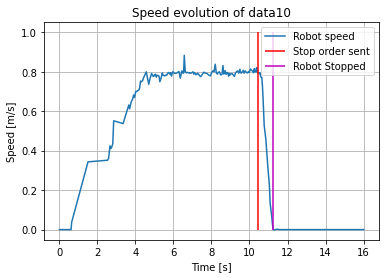

In [189]:
plt.figure()
plt.title("Speed evolution of data10")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

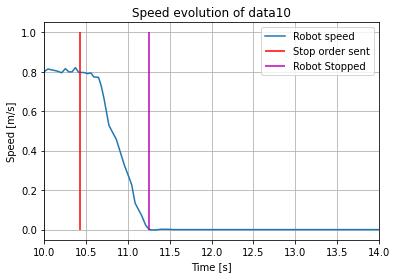

In [190]:
plt.figure()
plt.title("Speed evolution of data10")
plt.xlabel("Time [s]")
plt.ylabel("Speed [m/s]")
plt.grid("True")
plt.xlim(10, 14)
plt.plot (df.time, df.speed, label = "Robot speed")
plt.vlines(x = pauseTime, color = "r", ymin = 0, ymax = 1, label = "Stop order sent")
plt.vlines(x = stopTime, color = "m", ymin = 0, ymax = 1, label = "Robot Stopped")
plt.legend()
plt.show()

In [191]:
dfSpeedAtpauseTime = df[(df.time >= pauseTime)]
dfSpeedAtpauseTime.head()

,time,speed,Pause time
155,10.469957,0.796252,10.430126
156,10.517950,0.790406,10.430126
157,10.559142,0.793673,10.430126
158,10.591772,0.773485,10.430126
159,10.648829,0.771410,10.430126


By locking the speed of the first row, we can obtain the closest velocity measurement to the pauseTime velocity

In [192]:
speedAtPauseTime = dfSpeedAtpauseTime.iloc[0, 1]
speedAtPauseTime

0.7962517142295837

In [193]:
dfLatency = df[(df.speed <= speedAtPauseTime*0.99) & (df.time>pauseTime)]

In [194]:
dfLatency.head()

,time,speed,Pause time
158,10.591772,0.773485,10.430126
159,10.648829,0.771410,10.430126
160,10.681422,0.727948,10.430126
161,10.714239,0.664571,10.430126
162,10.773664,0.527723,10.430126


In [195]:
responseTime = dfLatency.iloc[0, 0]

In [196]:
latency = responseTime-pauseTime
latencyArray = np.append(latencyArray, latency)
latency

0.1616458892822248

# Check values in delay array

Mean value:

In [197]:
np.mean(delayArray)

0.923892259597778

Range:

In [198]:
np.max(delayArray)-np.min(delayArray)

0.18720602989196955

Standard deviation:

In [199]:
np.std(delayArray)

0.07050708243991965

In [200]:
avg = sum(delayArray)/len(delayArray)
avg

0.923892259597778

# Check values in latency array:

Mean value:

In [201]:
np.mean(latencyArray)

0.1548545625474714

Range:

In [202]:
np.max(latencyArray)-np.min(latencyArray)

0.10166382789611816

Standard deviation:

In [203]:
np.std(latencyArray)

0.02919994828527961

In [204]:
avg = sum(latencyArray)/len(latencyArray)
avg

0.1548545625474714